In [1]:
import jpype

jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import pickle as pkl
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, AutoMinorLocator, LogLocator
import numpy as np
import pandas as pd
from scipy.fft import rfft, rfftfreq
from scipy.signal import chirp as chirpsig
from scipy.signal import find_peaks as find_peaks
from scipy.signal import get_window


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
def generate_fft_plot(dir, interval_list):

    files = os.listdir(dir)

    scope0_files = [f for f in files if f.startswith('scope0') and f.endswith('.pkl')]
    scope1_files = [f for f in files if f.startswith('scope1') and f.endswith('.pkl')]
    cal1101_files = [f for f in files if f.startswith('BXSCAL_1101') and f.endswith('.pkl')]
    cal1100_files = [f for f in files if f.startswith('BXSCAL_1100') and f.endswith('.pkl')]

    scope0_files.sort()
    scope1_files.sort()
    cal1101_files.sort()
    cal1100_files.sort()

    scope0 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope0_files[1:]]
    scope1 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope1_files[1:]]
    cal1101 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1101_files[1:]]
    cal1100 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1100_files[1:]]

    fig, ax = plt.subplots(len(cal1100)-1, 2, figsize=(12, 10), sharex='col', tight_layout=True)

    for i, (cal0, cal1, scp, interval) in enumerate(list(zip(cal1100, cal1101, scope0, interval_list))):

        cal0_data = np.abs(cal0['deltaCountArray']) + np.abs(cal1['deltaCountArray']) #sum the two scintillators
        cal0_time = cal0['timeArray']

        sum = 0
        for j in range(len(cal0_time)-1):
            sum += (cal0_time[j+1] - cal0_time[j]) * 1e-6
        fifofreq = 1/(sum/len(cal0_time)) # find average FiFo frequency

        int_time_reconstructed = (cal0_time - cal0_time[0])*1e-6 # convert microsecond UNIX timestamp to offset in seconds
        ax[i, 0].plot(int_time_reconstructed, cal0_data, 'k')
        ax[i, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        ax[i, 0].set_xlim(.2, .7)

        cal0_yf = rfft(cal0_data)
        cal0_xf = rfftfreq(len(cal0_data), 1/fifofreq)
        ax[i, 1].plot(cal0_xf, np.abs(cal0_yf), 'b')
        ax[i, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        ax[i, 1].set_yscale('log')

        ax[i, 1].axvline(x=1/(interval*1e-3), color='r', linestyle='--', linewidth=1, label=f'{interval}ms interval')
        ax[i, 1].legend()

        ax[i, 0].set_ylabel(f'{interval}ms interval')

    ax[0, 0].set_title('Spill monitor signal [arb. counts]')
    ax[0, 1].set_title('Spill signal FFT [arb. amplitude]')

    ax[i, 0].set_xlabel("Seconds")
    ax[i, 1].set_xlabel("Hz")

    plt.tight_layout(pad=0.8, w_pad=0.1, h_pad=0.4)

    plt.suptitle("BXSCAL Spill Monitor FFTs for new SlowEx RFKO Signal Generator")


# Interval Scan from 8ms to .25ms

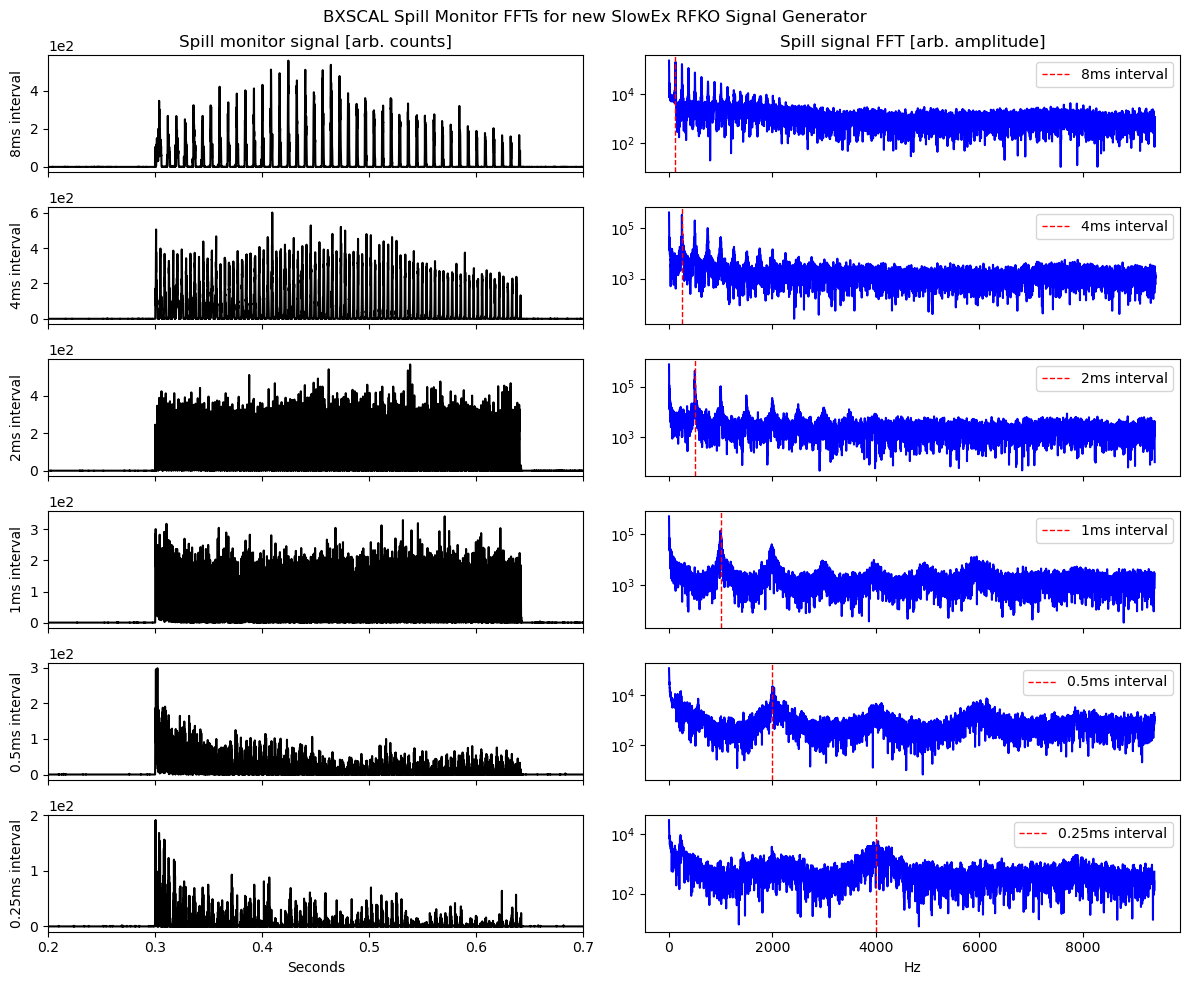

In [4]:
generate_fft_plot('../results/new_scope/2022-11-23T13:59:33', [8, 4, 2, 1, .5, .25])

IndexError: index 4 is out of bounds for axis 0 with size 4

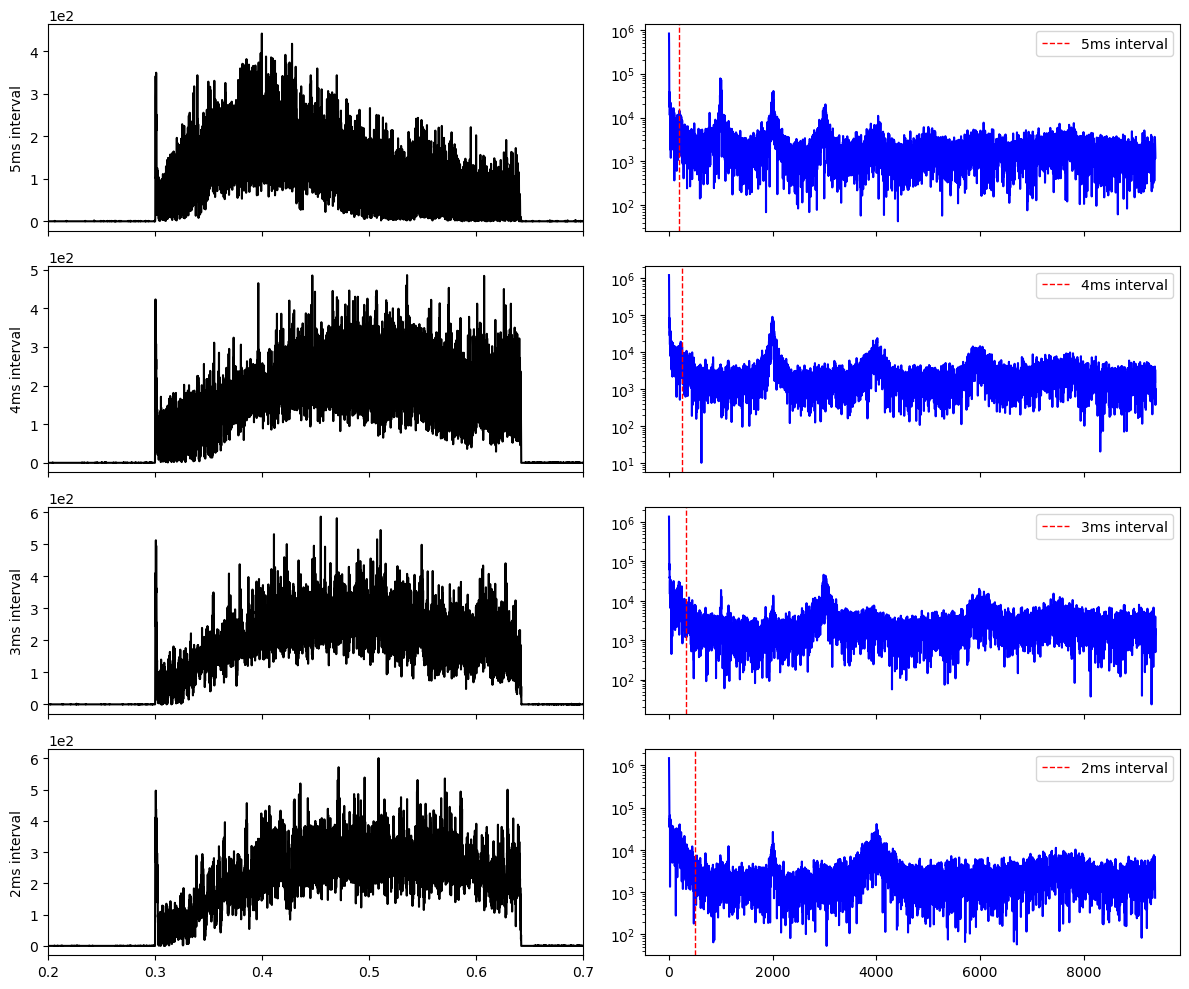

In [5]:
generate_fft_plot('../results/new_scope/2022-11-22T16:51:30', [5, 4, 3, 2, 1, .5])

# Comparing Scopes

In [ ]:
new_scope = '../results/new_scope/2022-11-23T13:59:33/scope0_2022-11-23T14:00:21.pkl'
with open(new_scope, 'rb') as f:
    new_scope_data = pkl.load(f)

(0.0, 1000000.0)

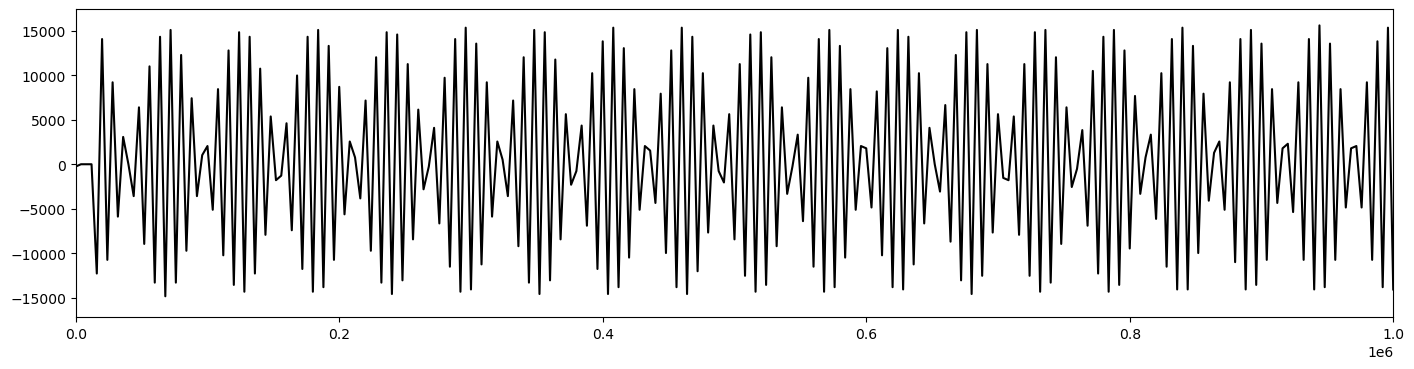

In [ ]:
fig, ax = plt.subplots(figsize=(17, 4))
ax.plot(new_scope_data[0]['time'], new_scope_data[0]['value'], 'k')
ax.set_xlim(0, 1e6)

Text(0.5, 0.98, 'BXSCAL Spill Monitor FFTs for new SlowEx RFKO Signal Generator')

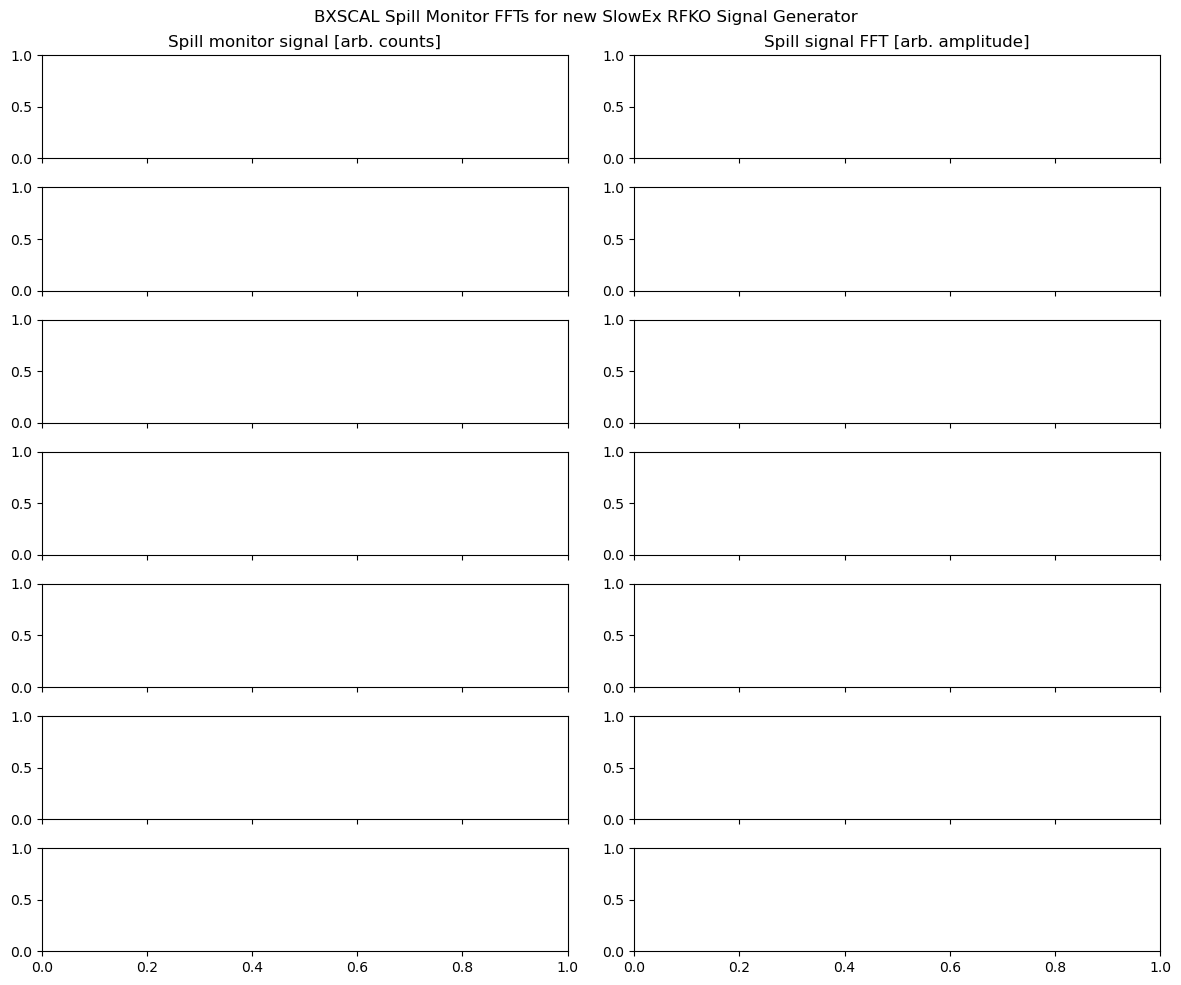

In [15]:
dir = '../results/2022-11-17T14:58:53'

interval_list = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

files = os.listdir(dir)

scope0_files = [f for f in files if f.startswith('scope0') and f.endswith('.pkl')]
scope1_files = [f for f in files if f.startswith('scope1') and f.endswith('.pkl')]
cal1101_files = [f for f in files if f.startswith('signal') and f.endswith('.pkl')]
cal1100_files = [f for f in files if f.startswith('signal') and f.endswith('.pkl')]

scope0_files.sort()
scope1_files.sort()
cal1101_files.sort()
cal1100_files.sort()

scope0 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope0_files[1:]]
scope1 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope1_files[1:]]
cal1101 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1101_files[1:]]
cal1100 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1100_files[1:]]

fig, ax = plt.subplots(len(cal1100)-1, 2, figsize=(12, 10), sharex='col', tight_layout=True)

for i, (cal0, scp, interval) in enumerate(list(zip(cal1100, scope0, interval_list))):

    cal0_data = np.abs(cal0)
    

    sum = 0
    for j in range(len(cal0_time)-1):
        sum += (cal0_time[j+1] - cal0_time[j]) * 1e-6
    fifofreq = 1/(sum/len(cal0_time)) # find average FiFo frequency

    int_time_reconstructed = (cal0_time - cal0_time[0])*1e-6 # convert microsecond UNIX timestamp to offset in seconds
    ax[i, 0].plot(int_time_reconstructed, cal0_data, 'k')
    ax[i, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 0].set_xlim(.2, .7)

    cal0_yf = rfft(cal0_data)
    cal0_xf = rfftfreq(len(cal0_data), 1/fifofreq)
    ax[i, 1].plot(cal0_xf, np.abs(cal0_yf), 'b')
    ax[i, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 1].set_yscale('log')

    ax[i, 1].axvline(x=1/(interval*1e-3), color='r', linestyle='--', linewidth=1, label=f'{interval}ms interval')
    ax[i, 1].legend()

    ax[i, 0].set_ylabel(f'{interval}ms interval')

ax[0, 0].set_title('Spill monitor signal [arb. counts]')
ax[0, 1].set_title('Spill signal FFT [arb. amplitude]')

# ax[i, 0].set_xlabel("Seconds")
# ax[i, 1].set_xlabel("Hz")

plt.tight_layout(pad=0.8, w_pad=0.1, h_pad=0.4)

plt.suptitle("BXSCAL Spill Monitor FFTs for new SlowEx RFKO Signal Generator")


In [18]:
cal1100

0     1     2     3     4     5     6     7     8     9     ...  1540  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1541  1542  1543  1544  1545  1546  1547  1548  1549  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  

[1 rows x 1550 columns]